# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

In [3]:
# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="

In [4]:
# Creating Dataframe
df = pd.DataFrame()
df["City"] = ""
df["Country"] = ""
df["Clouds"] = ""
df["Date"] = ""
df["Humidity"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Wind"] = ""

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Introduce Retrieval Notification
print("Beginning Data Retrieval")
print("____________________________________")

# Loop through selected cities
for x in np.arange(len(cities)): 
    print(f"Processing record {x} | {cities[x]}")
    try:
        currentWeather = requests.get(f"{url}{api_key}&q={cities[x]}&units=imperial").json()
        df.loc[x, "City"] = currentWeather["name"]
        df.loc[x, "Country"] = currentWeather["sys"]["country"]
        df.loc[x, "Clouds"] = currentWeather["clouds"]["all"]
        df.loc[x, "Date"] = currentWeather["dt"]
        df.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        df.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        df.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        df.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        df.loc[x, "Wind"] = currentWeather["wind"]["speed"]
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("_____________________________________")
print("Data Retrieval Complete")
print("_____________________________________")

cleanWeather = df.dropna()

Beginning Data Retrieval
____________________________________
Processing record 0 | nanortalik
Processing record 1 | mangochi
Processing record 2 | puerto ayora
Processing record 3 | yambio
City not found. Skipping...
Processing record 4 | barrow
Processing record 5 | mahebourg
Processing record 6 | mar del plata
Processing record 7 | buzmeyin
Processing record 8 | kavieng
Processing record 9 | castro
Processing record 10 | fortuna
Processing record 11 | pevek
Processing record 12 | ushuaia
Processing record 13 | batticaloa
Processing record 14 | mataura
Processing record 15 | byron bay
Processing record 16 | bluff
Processing record 17 | punta arenas
Processing record 18 | ibotirama
Processing record 19 | tsihombe
City not found. Skipping...
Processing record 20 | parras
City not found. Skipping...
Processing record 21 | bethel
Processing record 22 | ust-kulom
Processing record 23 | jumla
Processing record 24 | los llanos de aridane
Processing record 25 | thompson
Processing record 26 

Processing record 228 | muriwai beach
Processing record 229 | jujuy
City not found. Skipping...
Processing record 230 | pokrovsk
Processing record 231 | lazarev
Processing record 232 | lagoa
Processing record 233 | busayra
Processing record 234 | mookane
Processing record 235 | provideniya
Processing record 236 | shakawe
Processing record 237 | tuatapere
Processing record 238 | buala
Processing record 239 | kiama
Processing record 240 | grand river south east
City not found. Skipping...
Processing record 241 | lander
Processing record 242 | andenes
City not found. Skipping...
Processing record 243 | ishigaki
Processing record 244 | ekibastuz
Processing record 245 | tumannyy
City not found. Skipping...
Processing record 246 | healdsburg
Processing record 247 | soyo
Processing record 248 | waingapu
Processing record 249 | namibe
Processing record 250 | pangnirtung
Processing record 251 | martapura
Processing record 252 | brigantine
Processing record 253 | colares
Processing record 254 | 

Processing record 452 | sorvag
City not found. Skipping...
Processing record 453 | mbinga
Processing record 454 | port hedland
Processing record 455 | gua
Processing record 456 | toro
Processing record 457 | nefteyugansk
Processing record 458 | kamenka
Processing record 459 | mayumba
Processing record 460 | atambua
Processing record 461 | thunder bay
Processing record 462 | karaul
City not found. Skipping...
Processing record 463 | ghanzi
Processing record 464 | san policarpo
Processing record 465 | batemans bay
Processing record 466 | laguna
Processing record 467 | porto novo
Processing record 468 | tateyama
Processing record 469 | chachapoyas
Processing record 470 | atasu
Processing record 471 | ruzhyn
Processing record 472 | hualmay
Processing record 473 | constitucion
Processing record 474 | bowen
Processing record 475 | bandarbeyla
Processing record 476 | xinyu
Processing record 477 | orsha
Processing record 478 | grand gaube
Processing record 479 | carandai
Processing record 480 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Export the city data into a .csv
cleanWeather.to_csv('output_data_file.csv')

In [9]:
# Display counts of each column
cleanWeather.count()

City        571
Country     571
Clouds      571
Date        571
Humidity    571
Lat         571
Lng         571
Max Temp    571
Wind        571
dtype: int64

In [10]:
# Display the DataFrame
cleanWeather.head()

,City,Country,Clouds,Date,Humidity,Lat,Lng,Max Temp,Wind
0,Nanortalik,GL,24,1553654072,100,60.14,-45.24,24.7,18.28
1,Mangochi,MW,0,1553654166,97,-14.48,35.26,66.46,4.29
2,Puerto Ayora,EC,0,1553652971,90,-0.74,-90.35,79,5.01
4,Barrow,AR,0,1553654061,91,-38.31,-60.23,47.2,8.1
5,Mahebourg,MU,40,1553652000,88,-20.41,57.7,78.8,1.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

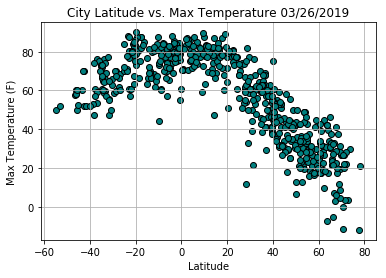

In [11]:
import time
date = time.strftime("%m/%d/%Y")
plt.scatter(cleanWeather["Lat"], cleanWeather["Max Temp"], color = "teal",
           edgecolors = "k")

plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.show()

In [12]:
# Save the figure
plt.savefig("temperature.png")

<Figure size 432x288 with 0 Axes>

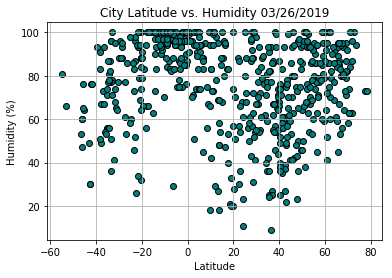

In [13]:
#Latitude vs. Humidity Plot
date = time.strftime("%m/%d/%Y")

plt.scatter(cleanWeather["Lat"], cleanWeather["Humidity"], color="teal",
           edgecolors = "k")

plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

In [14]:
# Save the figure
plt.savefig("humidity.png")

<Figure size 432x288 with 0 Axes>

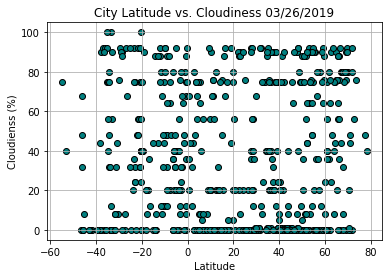

In [15]:
#Latitude vs. Cloudiness Plot
date = time.strftime("%m/%d/%Y")

plt.scatter(cleanWeather["Lat"], cleanWeather["Clouds"], color="teal",
           edgecolors = "k")

plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudienss (%)")
plt.grid(True)
plt.show()

In [16]:
# Save the figure
plt.savefig("cloudiness.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

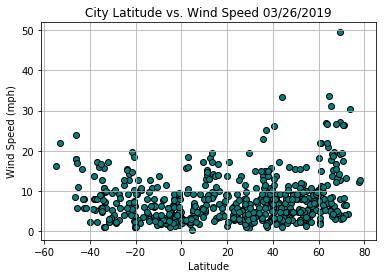

In [17]:
date = time.strftime("%m/%d/%Y")

plt.scatter(cleanWeather["Lat"], cleanWeather["Wind"], color="teal",
           edgecolors = "k")

plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()

In [18]:
# Save the figure
plt.savefig("wind_speed.png")

<Figure size 432x288 with 0 Axes>

Analysis:
1) Near the equator, around Latitude 0, we tend to observe the cities with the highest temperatures.
2) Cloudiness seems to be evenly distributed with no particular congregation of clouds in cities closer to equator.
3) Cities with higher latitudes seem to experience wind with higher winds.